### Libraries for dataset manipulation and visulization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Dataset Loading

In [2]:
dataset = pd.read_csv('C:\\Users\\Mahmood Yousaf\\Desktop\\FYP\\Final-Year-Project-Soil-Analysis-using-machine-learning\\Extracted Features\\pH_Index_with_EC_value.csv')

### Preprocessing on dataset

In [3]:
X = np.array(dataset['pH_Index'])
Y = np.array(dataset['EC_Value'])
print(X)
print(Y)

[0.00703939 0.0073076  0.00680586 ... 0.00868003 0.0176074  0.01053636]
[0.54 0.54 0.55 ... 1.1  0.45 0.45]


In [4]:
X = X.reshape(len(X),1)
Y = Y.reshape(len(Y),1)
print(X,Y)

[[0.00703939]
 [0.0073076 ]
 [0.00680586]
 ...
 [0.00868003]
 [0.0176074 ]
 [0.01053636]] [[0.54]
 [0.54]
 [0.55]
 ...
 [1.1 ]
 [0.45]
 [0.45]]


### DTR model training

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, Y)

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators=50, random_state = 0)
regressor.fit(X_train,y_train)

C:\Users\MAHMOO~1\AppData\Local\Temp/ipykernel_12336/3513569335.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)


RandomForestRegressor(n_estimators=50, random_state=0)

### Prediction 

In [7]:
prediction = regressor.predict([[500]])
print(prediction)

[1.129]


In [8]:
pred = regressor.predict(X_val)
print(pred)

[1.2504     0.228      0.4848     0.154      1.29962    1.5832
 1.052      0.5468     0.563      0.1152     1.213      0.3276
 1.1092     1.1458     0.41184    1.6672     0.94164    8.3548
 1.3014     0.98       1.3494     1.5994     1.1732     0.8312
 0.8801     0.99948    0.7082     0.85908667 0.5424     1.1718
 1.1824     1.5994     0.4424     0.4842     1.1388     1.7914
 0.893      1.4952     0.3916     6.3556     0.7736     0.7496
 0.60054    0.4848     1.00652    1.6672     0.971      1.06328
 0.4786     1.554      1.052      6.3556     2.0988     0.268
 0.4826     0.3304     0.7108     1.1632     1.0452     0.52960971
 1.524168   0.6704     1.3494     0.49132    0.558      1.02648
 0.3304     1.21345    0.9972     0.2951     1.2153     0.36666
 0.3606     1.15244    1.0028     0.9556     0.364      0.54842
 1.047      1.4228     1.5436     0.7748     0.7766     1.08325333
 2.4294     0.1808     0.48152    0.6704     0.893      0.5356
 0.9436     5.4944     2.5098     0.63321333

In [9]:
# mse , mae and r2_score values
mae_value = mean_absolute_error(y_val, pred)
mse_value = mean_squared_error(y_val, pred)
r2_score_value = r2_score(y_val, pred)
# Total error with mse , mae and r2_score
print(f"MSE {mse_value}")
print(f"MAE {mae_value}")
print(f"r2_score {r2_score_value}")

MSE 1.4751694452212838
MAE 0.6394070612244899
r2_score -0.402836276522357


### Visulization

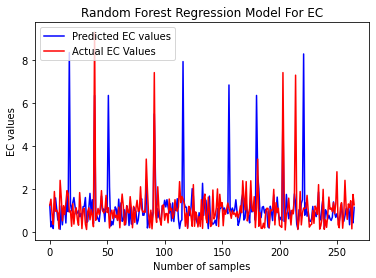

In [10]:
plt.plot(pred,color = 'Blue')
plt.plot(y_val, color = 'red')
plt.title("Random Forest Regression Model For EC")
plt.legend(['Predicted EC values', 'Actual EC Values'], loc='upper left')
plt.xlabel('Number of samples')
plt.ylabel('EC values')
plt.savefig("RFRmodelForECestimationUsingpHIndexes.jpg")

In [11]:
print(pred)

[1.2504     0.228      0.4848     0.154      1.29962    1.5832
 1.052      0.5468     0.563      0.1152     1.213      0.3276
 1.1092     1.1458     0.41184    1.6672     0.94164    8.3548
 1.3014     0.98       1.3494     1.5994     1.1732     0.8312
 0.8801     0.99948    0.7082     0.85908667 0.5424     1.1718
 1.1824     1.5994     0.4424     0.4842     1.1388     1.7914
 0.893      1.4952     0.3916     6.3556     0.7736     0.7496
 0.60054    0.4848     1.00652    1.6672     0.971      1.06328
 0.4786     1.554      1.052      6.3556     2.0988     0.268
 0.4826     0.3304     0.7108     1.1632     1.0452     0.52960971
 1.524168   0.6704     1.3494     0.49132    0.558      1.02648
 0.3304     1.21345    0.9972     0.2951     1.2153     0.36666
 0.3606     1.15244    1.0028     0.9556     0.364      0.54842
 1.047      1.4228     1.5436     0.7748     0.7766     1.08325333
 2.4294     0.1808     0.48152    0.6704     0.893      0.5356
 0.9436     5.4944     2.5098     0.63321333

In [12]:
print(y_val)

[[1.25 ]
 [1.52 ]
 [0.81 ]
 [0.351]
 [1.88 ]
 [0.96 ]
 [1.01 ]
 [0.88 ]
 [0.14 ]
 [2.4  ]
 [1.6  ]
 [0.515]
 [1.22 ]
 [0.81 ]
 [1.38 ]
 [1.92 ]
 [1.77 ]
 [0.93 ]
 [0.98 ]
 [0.26 ]
 [1.31 ]
 [0.36 ]
 [0.96 ]
 [1.12 ]
 [0.58 ]
 [0.31 ]
 [1.83 ]
 [1.09 ]
 [0.15 ]
 [1.05 ]
 [1.1  ]
 [0.36 ]
 [0.11 ]
 [0.94 ]
 [1.12 ]
 [0.56 ]
 [1.03 ]
 [0.75 ]
 [0.24 ]
 [9.3  ]
 [0.54 ]
 [0.77 ]
 [1.09 ]
 [0.81 ]
 [1.09 ]
 [1.92 ]
 [1.01 ]
 [0.88 ]
 [0.96 ]
 [1.7  ]
 [0.9  ]
 [1.12 ]
 [0.18 ]
 [0.85 ]
 [1.01 ]
 [0.615]
 [1.02 ]
 [0.67 ]
 [0.78 ]
 [0.54 ]
 [1.15 ]
 [0.19 ]
 [1.13 ]
 [1.76 ]
 [1.2  ]
 [0.316]
 [0.41 ]
 [1.22 ]
 [0.93 ]
 [0.88 ]
 [1.64 ]
 [1.09 ]
 [0.19 ]
 [1.19 ]
 [0.44 ]
 [1.1  ]
 [1.47 ]
 [0.95 ]
 [1.   ]
 [2.1  ]
 [1.08 ]
 [0.92 ]
 [0.96 ]
 [0.91 ]
 [3.39 ]
 [1.95 ]
 [0.85 ]
 [0.19 ]
 [1.01 ]
 [0.14 ]
 [0.91 ]
 [7.42 ]
 [0.89 ]
 [0.44 ]
 [2.1  ]
 [1.1  ]
 [0.55 ]
 [0.31 ]
 [1.21 ]
 [1.26 ]
 [0.54 ]
 [0.85 ]
 [0.85 ]
 [0.42 ]
 [1.53 ]
 [1.   ]
 [1.08 ]
 [0.63 ]
 [0.79 ]
 [1.5  ]
 [1.02 ]
 